In [61]:
import pandas as pd
import seaborn as sns;sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
mass = pd.read_excel('./香精香料色谱峰共有模式数据.xlsx')

In [62]:
grp = pd.Series(np.array(range(len(mass)-1))+1)

In [68]:
grp.loc[0:58] = 'A'
grp.loc[59:107] = 'B'
grp.loc[108:] =  'C'

In [6]:
common = mass.loc[0]

In [13]:
sample = mass.loc[mass.index!=0].set_index('样品')
sample.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
样品,,,,,,,,,,,,,,,,,,,,
20050157r01,2424580,28449800,0,3047820,0,0,0,0,0,2288770,1649840,3334070,1238340,0,8941170,1624750,9683580,4520930,11997100,4053890
20050157r02,2550510,29625100,0,3185880,0,0,0,0,0,2331120,1718410,3522900,1308950,0,8488620,1756240,10283500,4914310,14457800,4430760
20050157r03,2654240,31649600,0,3449900,0,0,0,0,0,2578510,1869320,3763510,1408770,0,11742200,1905500,10971400,5111580,11420200,4591100
20050211r01,2519540,29418800,0,3002040,0,0,0,0,0,2398620,1734050,3535080,1405090,0,9717440,1837060,10158000,4882060,12067800,4324000
20050211r02,2601330,31184500,0,3179720,0,0,0,0,0,2565980,1844650,3717840,1460450,0,9674020,1939540,10762800,5169070,13359200,4549030


In [16]:
from sklearn.preprocessing import minmax_scale

In [72]:
sample_scaled = minmax_scale(sample)
sample_scaled = pd.DataFrame(sample_scaled,index=grp.values)

In [76]:
rowcolor

{'A': 'r', 'B': 'g', 'C': 'b'}

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


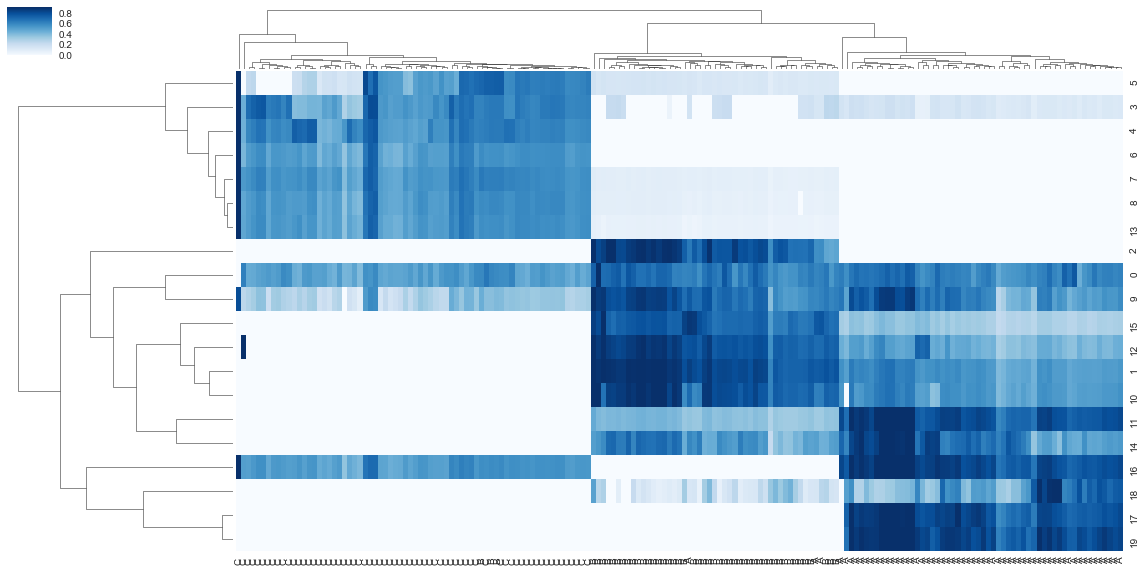

In [82]:
g = sns.clustermap(sample_scaled.T, cmap='Blues',robust=True,figsize=(20,10))
g.savefig('香精香料聚类热图')